In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(r"C:\Users\User\Downloads\transaction_data.csv")
df2 = pd.read_csv(r"C:\Users\User\Downloads\purchase_behaviour.csv")


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [3]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
df = pd.merge(df1, df2, on = 'LYLTY_CARD_NBR', how = 'outer')

In [7]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [9]:
unique_products = df['PROD_NAME'].nunique()
unique_products

114

In [10]:
product_names = df['PROD_NAME'].unique()
product_names

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [11]:
# Filter the DataFrame to exclude rows with 'Salsa' in the 'PROD_NAME' column
df = df[~df['PROD_NAME'].str.contains('Salsa', case=False)]

# Get the unique product names from the filtered DataFrame
product_names = df['PROD_NAME'].unique()
product_names

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'WW D/Style Chip     Sea Salt 200g',
       'Thins Chips Light&  Tangy 17

In [12]:
number_of_items = df['PROD_NAME'].nunique()
number_of_items

105

In [13]:
df.describe(include = 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000,246742,246742
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN,7,3
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN,50793,95043
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322,NaN,NaN
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,NaN,0.659831,3.077828,NaN,NaN
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,NaN,NaN
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000,NaN,NaN
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000,NaN,NaN
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000,NaN,NaN


In [14]:
# Convert Excel serial date format to datetime
df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['DATE'], 'D')

# Verify the conversion to datetime
print(df['DATE'].dtype)

# Extract year and month from the date
df['YearMonth'] = df['DATE'].dt.to_period('M')

# Find the unique months
unique_months = sorted(df['YearMonth'].unique())

datetime64[ns]


In [15]:
unique_months

[Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 Period('2018-09', 'M'),
 Period('2018-10', 'M'),
 Period('2018-11', 'M'),
 Period('2018-12', 'M'),
 Period('2019-01', 'M'),
 Period('2019-02', 'M'),
 Period('2019-03', 'M'),
 Period('2019-04', 'M'),
 Period('2019-05', 'M'),
 Period('2019-06', 'M')]

In [16]:
# Calculate Z-scores
df.loc[:, 'Z_Score'] = (df['PROD_QTY'] - df['PROD_QTY'].mean()) / df['PROD_QTY'].std()

# Detect outliers
outliers = df[np.abs(df['Z_Score']) > 5]
outliers


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth,Z_Score
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,2018-08,300.216118
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,2019-05,300.216118


In [17]:
df = df.drop([71456,71457])

In [18]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth,Z_Score
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,0.139336
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,1.654875
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,0.139336
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,-1.376203
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,0.139336


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
number_of_items_sold = df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index(name = 'QSold')
number_of_items_sold

,PROD_NAME,QSold
0,Burger Rings 220g,2970
1,CCs Nacho Cheese 175g,2839
2,CCs Original 175g,2880
3,CCs Tasty Cheese 175g,2890
4,Cheetos Chs & Bacon Balls 190g,2801
...,...,...
100,WW Original Corn Chips 200g,2825
101,WW Original Stacked Chips 160g,2802
102,WW Sour Cream &OnionStacked Chips 160g,2802
103,WW Supreme Cheese Corn Chips 200g,2837


In [21]:
top_10_by_quantity_sold = number_of_items_sold.sort_values(by='QSold', ascending= False)
top_10_by_salesquantity= top_10_by_quantity_sold.head(10)
top_10_by_salesquantity

,PROD_NAME,QSold
31,Kettle Mozzarella Basil & Pesto 175g,6381
40,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
8,Cobs Popd Sea Salt Chips 110g,6277
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
91,Tostitos Splash Of Lime 175g,6234
95,Tyrrells Crisps Ched & Chives 165g,6227
28,Kettle 135g Swt Pot Sea Salt,6212
26,Infuzions Thai SweetChili PotatoMix 110g,6206
88,Thins Potato Chips Hot & Spicy 175g,6185
15,Doritos Corn Chips Cheese Supreme 170g,6180


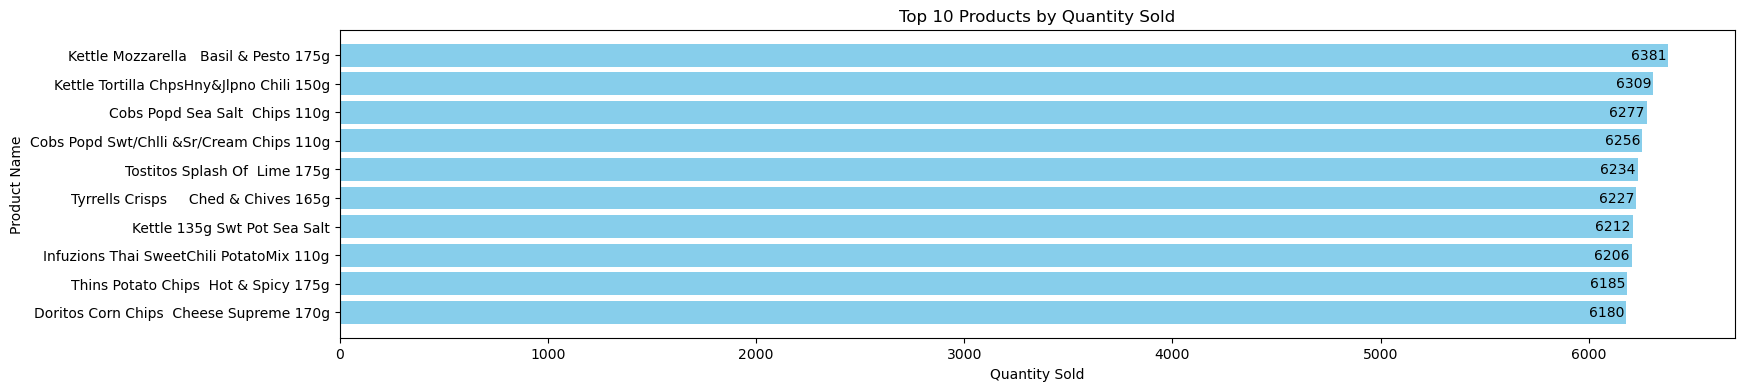

In [22]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top_10_by_salesquantity['PROD_NAME'], top_10_by_salesquantity['QSold'], color='skyblue')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Add quantity sold labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()


In [23]:
# Group by YearMonth and sum PROD_QTY
number_of_items_sold_per_month = df.groupby('YearMonth')['PROD_QTY'].sum().reset_index(name='QSold')

# Convert YearMonth to timestamp
number_of_items_sold_per_month['YearMonth'] = pd.to_datetime(number_of_items_sold_per_month['YearMonth'].astype(str), format='%Y-%m')

# Extract month name and year
number_of_items_sold_per_month['MonthYear'] = number_of_items_sold_per_month['YearMonth'].dt.strftime('%B %Y')

number_of_items_sold_per_month

,YearMonth,QSold,MonthYear
0,2018-07-01,40310,July 2018
1,2018-08-01,38481,August 2018
2,2018-09-01,39001,September 2018
3,2018-10-01,39911,October 2018
4,2018-11-01,39045,November 2018
5,2018-12-01,40778,December 2018
6,2019-01-01,39519,January 2019
7,2019-02-01,36541,February 2019
8,2019-03-01,40534,March 2019
9,2019-04-01,38980,April 2019


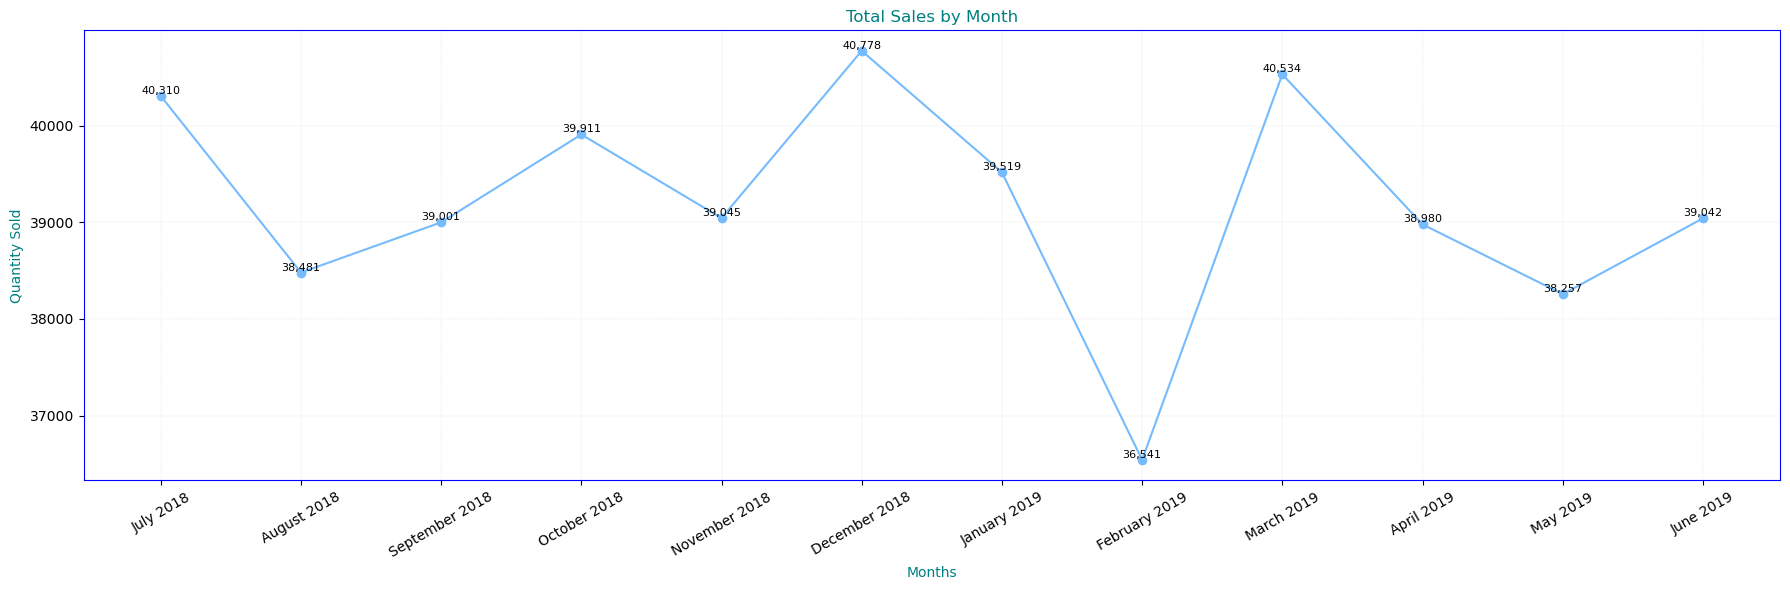

In [24]:
# Plotting the trend chart
plt.figure(figsize=(18, 6))
plt.plot(number_of_items_sold_per_month['MonthYear'], number_of_items_sold_per_month['QSold'], marker='o', linestyle='-', color='xkcd:sky blue')
plt.title('Total Sales by Month', color='teal')
plt.xlabel('Months', color='teal')
plt.ylabel('Quantity Sold', color='teal')
plt.grid(True, linestyle='--', linewidth=0.10)
plt.xticks(number_of_items_sold_per_month['MonthYear'], rotation=30)
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

# Annotate each point with the quantity sold
for i in range(len(number_of_items_sold_per_month)):
    plt.text(number_of_items_sold_per_month['MonthYear'][i], number_of_items_sold_per_month['QSold'][i], 
             f'{number_of_items_sold_per_month["QSold"][i]:,}', 
             fontsize=8, ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [25]:
items_sold_per_month = df.groupby(['YearMonth' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QSold').sort_values(by = 'QSold', ascending=False)
items_sold_per_month.head(5)

,YearMonth,PROD_NAME,QSold
473,2018-11,Pringles Sweet&Spcy BBQ 134g,630
670,2019-01,Kettle Tortilla ChpsHny&Jlpno Chili 150g,613
619,2018-12,Twisties Chicken270g,610
556,2018-12,Kettle Mozzarella Basil & Pesto 175g,601
935,2019-03,Tyrrells Crisps Ched & Chives 165g,593


#TOP 10 PRODUCTS BY SALES

In [26]:
total_sales_by_product = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index(name = 'TotalSales').sort_values(by = 'TotalSales', ascending=False)
top_10_products = total_sales_by_product.head(10)
top_10_products

,PROD_NAME,TotalSales
11,Dorito Corn Chp Supreme 380g,39052.0
79,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
71,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
31,Kettle Mozzarella Basil & Pesto 175g,34457.4
70,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
37,Kettle Sweet Chilli And Sour Cream 175g,33031.8
32,Kettle Original 175g,32740.2
33,Kettle Sea Salt And Vinegar 175g,32589.0


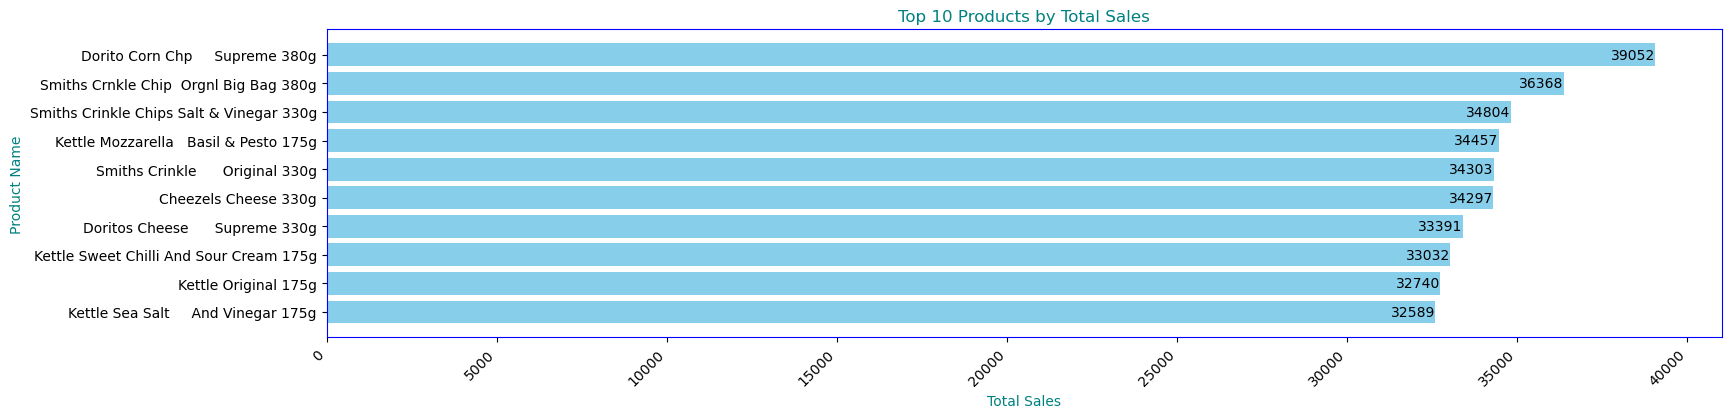

In [27]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top_10_products['PROD_NAME'], top_10_products['TotalSales'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 10 Products by Total Sales',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [28]:
total_sales_by_month = df.groupby('YearMonth')['TOT_SALES'].sum().reset_index(name = 'TotalSales')
total_sales_by_month

,YearMonth,TotalSales
0,2018-07,154514.50
1,2018-08,147422.05
2,2018-09,150058.90
3,2018-10,153454.10
4,2018-11,149609.50
5,2018-12,156461.60
6,2019-01,151593.80
7,2019-02,140480.00
8,2019-03,155772.80
9,2019-04,149374.20


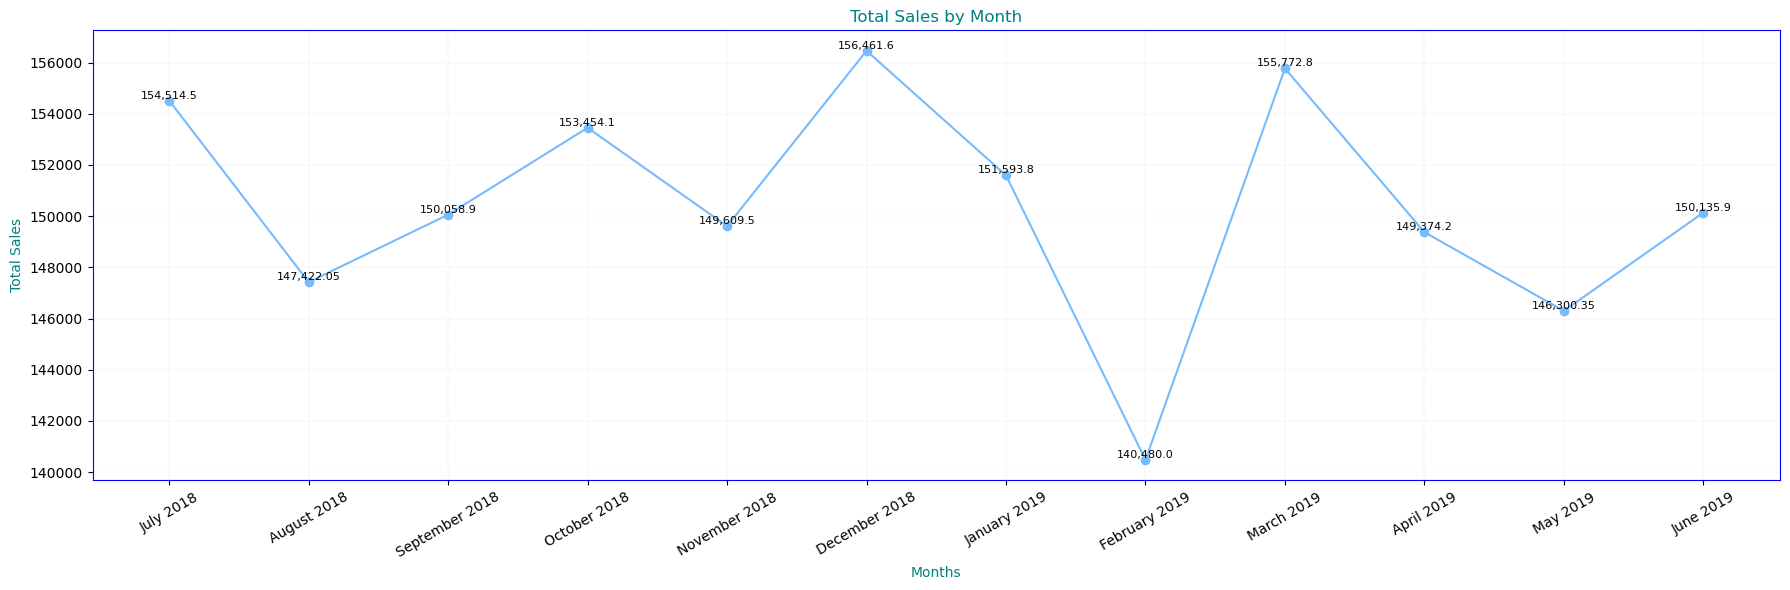

In [29]:
# Group by YearMonth and sum TOT_SALES
total_sales_by_month = df.groupby('YearMonth')['TOT_SALES'].sum().reset_index(name='TotalSales')

# Convert YearMonth to timestamp
total_sales_by_month['YearMonth'] = pd.to_datetime(total_sales_by_month['YearMonth'].astype(str), format='%Y-%m')

# Convert YearMonth to datetime
#total_sales_by_month['YearMonth'] = pd.to_datetime(total_sales_by_month['YearMonth'], format='%Y-%b')

# Extract month name and year
total_sales_by_month['MonthYear'] = total_sales_by_month['YearMonth'].dt.strftime('%B %Y')



# Plotting the trend chart
plt.figure(figsize=(18, 6))
plt.plot(total_sales_by_month['MonthYear'], total_sales_by_month['TotalSales'], marker='o', linestyle='-', color='xkcd:sky blue')
plt.title('Total Sales by Month', color='teal')
plt.xlabel('Months', color='teal')
plt.ylabel('Total Sales', color='teal')
plt.grid(True, linestyle='--', linewidth=0.10)
plt.xticks(total_sales_by_month['MonthYear'], rotation=30)
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

# Annotate each point with the quantity sold
for i in range(len(total_sales_by_month)):
    plt.text(total_sales_by_month['MonthYear'][i], total_sales_by_month['TotalSales'][i], 
             f'{total_sales_by_month["TotalSales"][i]:,}', 
             fontsize=8, ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [30]:
people_count = df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().reset_index(name = 'CustomerCount').sort_values(by = 'CustomerCount', ascending=False)
people_count

,LIFESTAGE,CustomerCount
4,RETIREES,14555
3,OLDER SINGLES/COUPLES,14389
6,YOUNG SINGLES/COUPLES,14044
2,OLDER FAMILIES,9630
5,YOUNG FAMILIES,9036
0,MIDAGE SINGLES/COUPLES,7141
1,NEW FAMILIES,2492


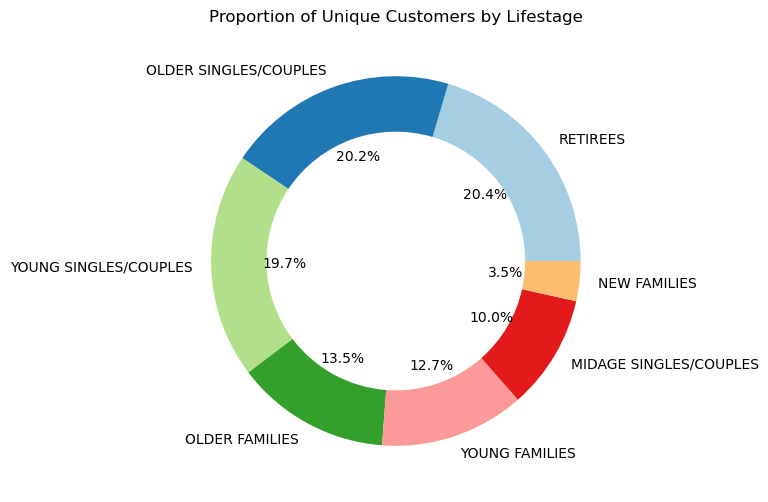

In [31]:
# Donut Chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(people_count['CustomerCount'], labels=people_count['LIFESTAGE'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(people_count))), wedgeprops=dict(width=0.3))

for autotext in autotexts:
    autotext.set_color('black')

plt.title('Proportion of Unique Customers by Lifestage')
plt.show()

In [32]:
retirees = df[df['LIFESTAGE'] == 'RETIREES']
revenue_from_retirees = retirees.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top5_products_retirees = revenue_from_retirees.head(5)
top5_products_retirees

,LIFESTAGE,PROD_NAME,Amount
11,RETIREES,Dorito Corn Chp Supreme 380g,7527.0
79,RETIREES,Smiths Crnkle Chip Orgnl Big Bag 380g,7026.9
31,RETIREES,Kettle Mozzarella Basil & Pesto 175g,6933.6
70,RETIREES,Smiths Crinkle Original 330g,6703.2
37,RETIREES,Kettle Sweet Chilli And Sour Cream 175g,6615.0


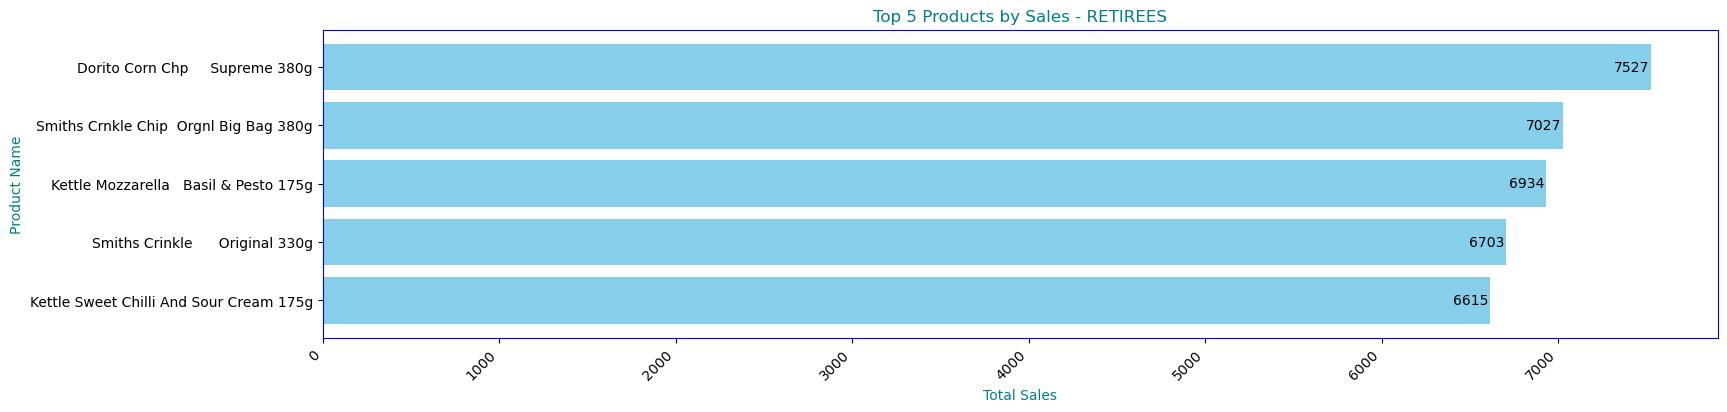

In [33]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top5_products_retirees['PROD_NAME'], top5_products_retirees['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - RETIREES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [34]:
oldersc = df[df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']
revenue_from_oldersc = oldersc.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top10_products_oldersc = revenue_from_oldersc.head(5)
top10_products_oldersc

,LIFESTAGE,PROD_NAME,Amount
11,OLDER SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,8459.75
79,OLDER SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,7528.40
71,OLDER SINGLES/COUPLES,Smiths Crinkle Chips Salt & Vinegar 330g,7182.00
70,OLDER SINGLES/COUPLES,Smiths Crinkle Original 330g,7130.70
6,OLDER SINGLES/COUPLES,Cheezels Cheese 330g,7119.30


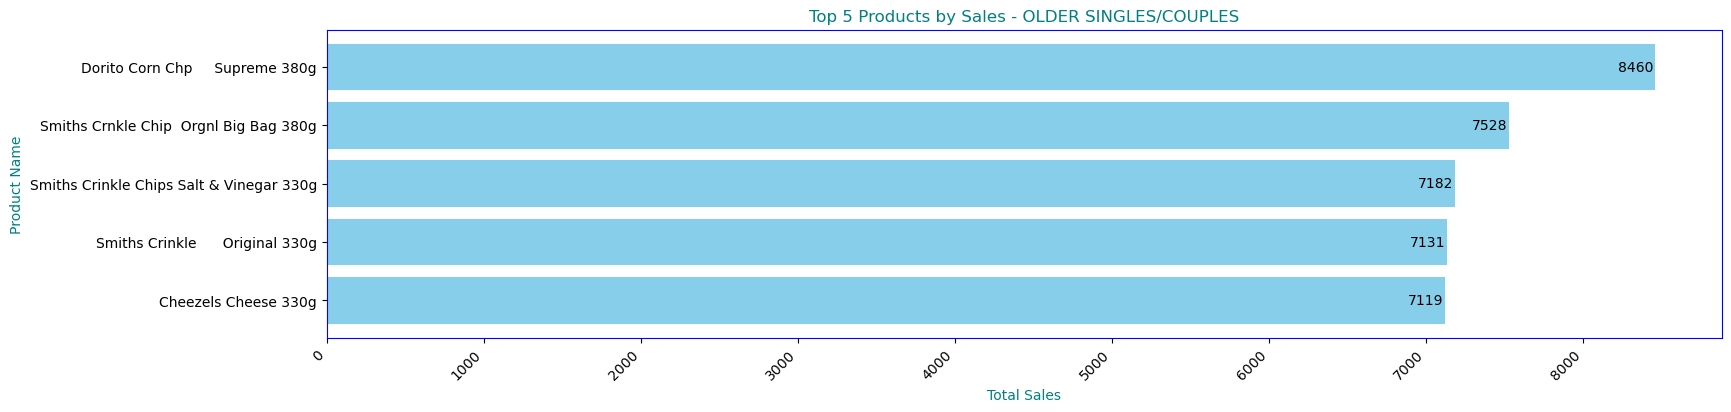

In [35]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top10_products_oldersc['PROD_NAME'], top10_products_oldersc['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - OLDER SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [36]:
youngsc = df[df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']
revenue_from_youngsc = youngsc.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top10_products_youngsc = revenue_from_youngsc.head(5)
top10_products_youngsc

,LIFESTAGE,PROD_NAME,Amount
11,YOUNG SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,5655.0
79,YOUNG SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,5227.4
31,YOUNG SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,5162.4
71,YOUNG SINGLES/COUPLES,Smiths Crinkle Chips Salt & Vinegar 330g,4930.5
12,YOUNG SINGLES/COUPLES,Doritos Cheese Supreme 330g,4856.4


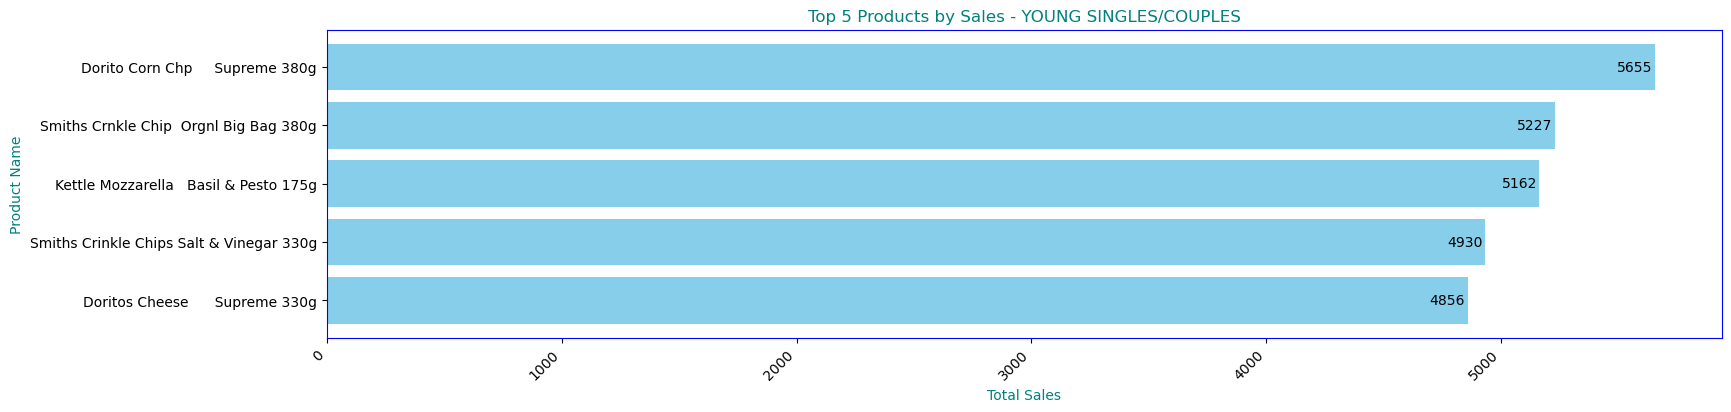

In [37]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top10_products_youngsc['PROD_NAME'], top10_products_youngsc['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - YOUNG SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [38]:
older = df[df['LIFESTAGE'] == 'OLDER FAMILIES']
revenue_from_older = older.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top10_products_older = revenue_from_older.head(5)
top10_products_older

,LIFESTAGE,PROD_NAME,Amount
11,OLDER FAMILIES,Dorito Corn Chp Supreme 380g,6682.0
71,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,6549.3
70,OLDER FAMILIES,Smiths Crinkle Original 330g,6247.2
79,OLDER FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,6165.5
12,OLDER FAMILIES,Doritos Cheese Supreme 330g,5916.6


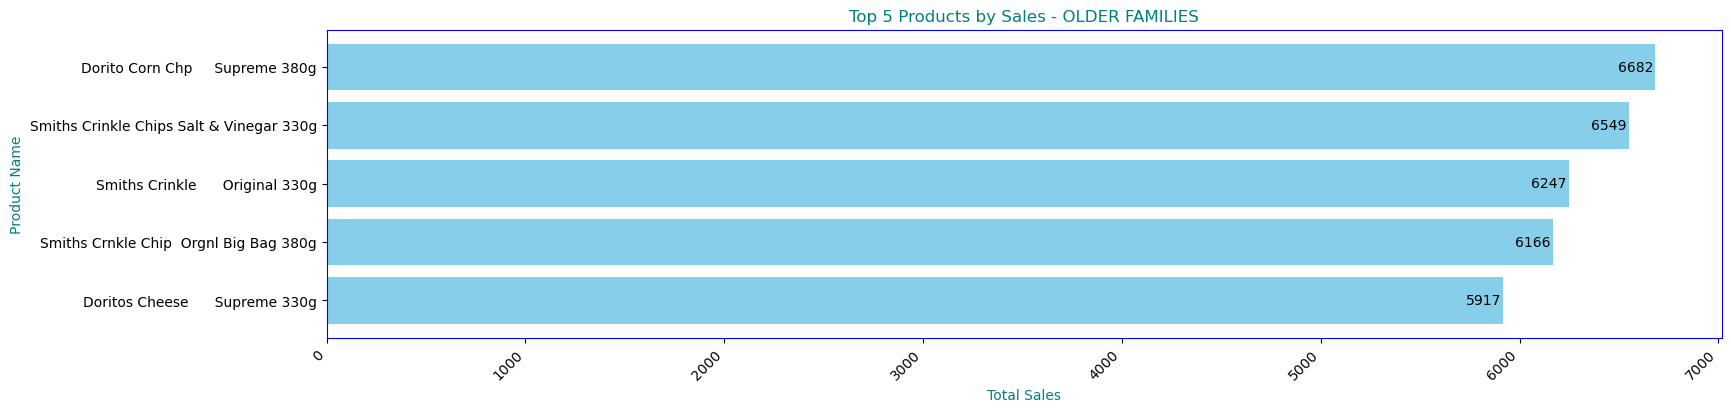

In [39]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top10_products_older['PROD_NAME'], top10_products_older['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - OLDER FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [40]:
young = df[df['LIFESTAGE'] == 'YOUNG FAMILIES']
revenue_from_young = young.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top10_products_young = revenue_from_young.head(5)
top10_products_young

,LIFESTAGE,PROD_NAME,Amount
11,YOUNG FAMILIES,Dorito Corn Chp Supreme 380g,5993.0
6,YOUNG FAMILIES,Cheezels Cheese 330g,5734.2
79,YOUNG FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,5664.0
32,YOUNG FAMILIES,Kettle Original 175g,5616.0
71,YOUNG FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,5540.4


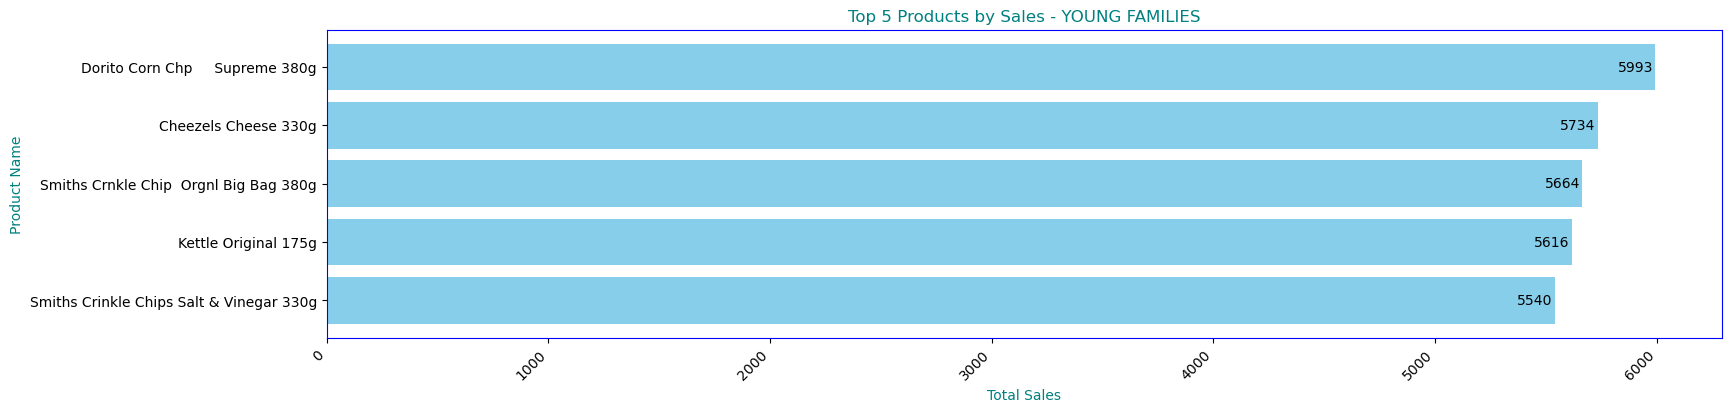

In [41]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top10_products_young['PROD_NAME'], top10_products_young['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - YOUNG FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [42]:
mid = df[df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
revenue_from_mid = mid.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top10_products_mid = revenue_from_mid.head(5)
top10_products_mid

,LIFESTAGE,PROD_NAME,Amount
79,MIDAGE SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,3746.5
6,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,3648.0
11,MIDAGE SINGLES/COUPLES,Dorito Corn Chp Supreme 380g,3646.5
37,MIDAGE SINGLES/COUPLES,Kettle Sweet Chilli And Sour Cream 175g,3418.2
31,MIDAGE SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,3385.8


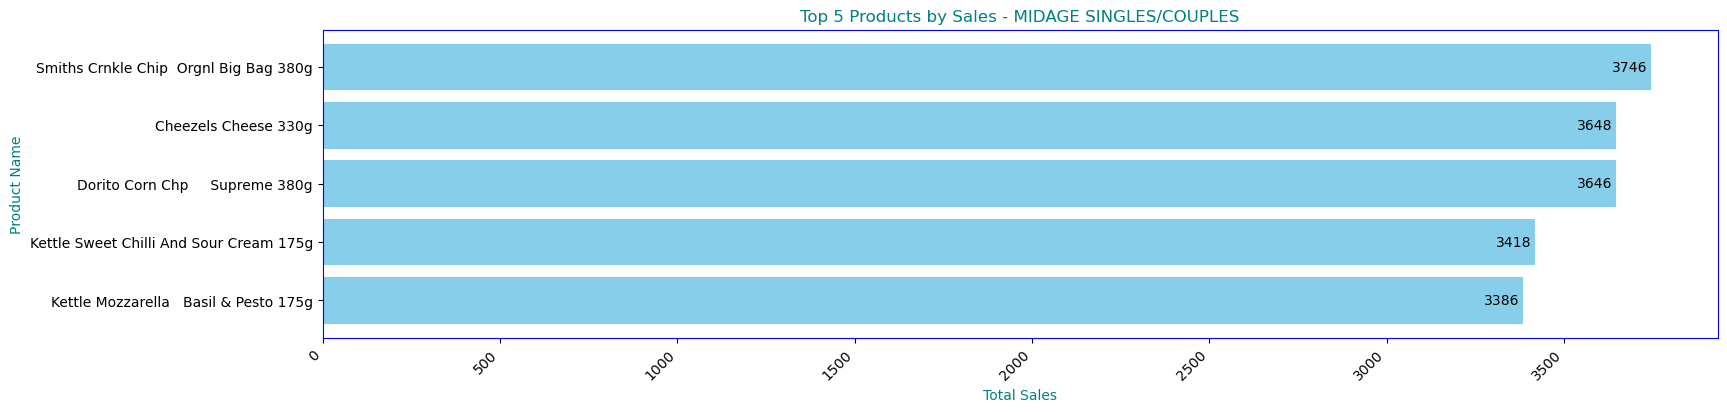

In [43]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top10_products_mid['PROD_NAME'], top10_products_mid['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - MIDAGE SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [44]:
new = df[df['LIFESTAGE'] == 'NEW FAMILIES']
revenue_from_new = new.groupby(['LIFESTAGE' , 'PROD_NAME'])['TOT_SALES'].sum().reset_index(name = 'Amount').sort_values(by= ['LIFESTAGE', 'Amount'], ascending=[True, False])
top5_products_new = revenue_from_new.head(5)
top5_products_new

,LIFESTAGE,PROD_NAME,Amount
11,NEW FAMILIES,Dorito Corn Chp Supreme 380g,1088.75
30,NEW FAMILIES,Kettle Honey Soy Chicken 175g,1063.80
79,NEW FAMILIES,Smiths Crnkle Chip Orgnl Big Bag 380g,1008.90
31,NEW FAMILIES,Kettle Mozzarella Basil & Pesto 175g,982.80
12,NEW FAMILIES,Doritos Cheese Supreme 330g,957.60


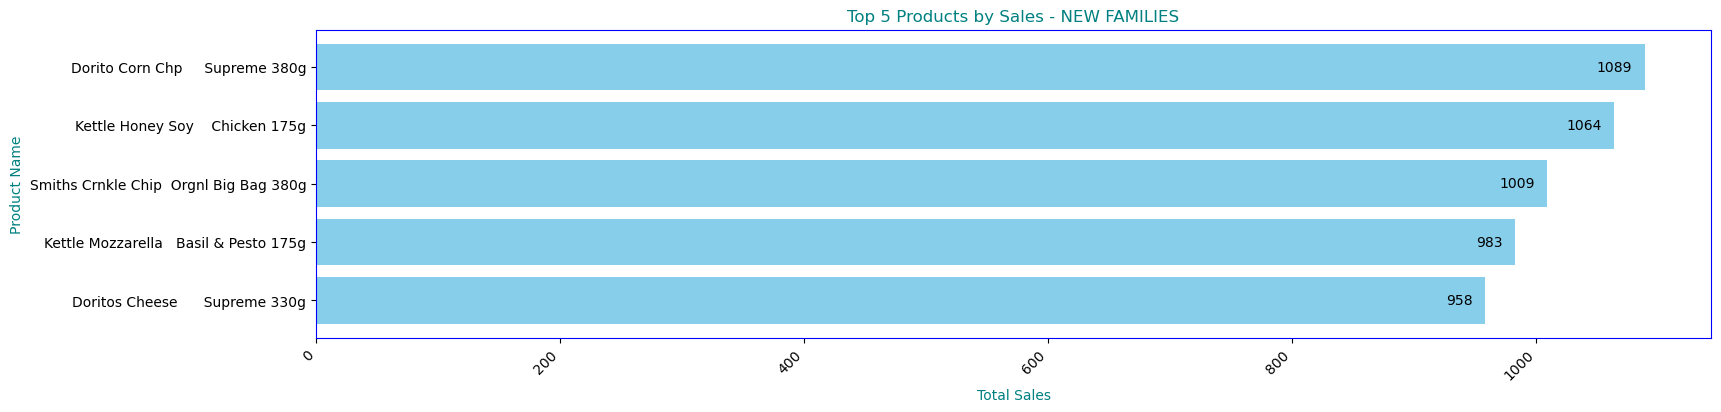

In [45]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top5_products_new['PROD_NAME'], top5_products_new['Amount'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Sales - NEW FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [46]:
retirees = df[df['LIFESTAGE'] == 'RETIREES']
quantity_sold_retirees = retirees.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_retirees

,LIFESTAGE,PROD_NAME,QtySold
31,RETIREES,Kettle Mozzarella Basil & Pesto 175g,1284
85,RETIREES,Thins Chips Light& Tangy 175g,1278
46,RETIREES,Pringles Barbeque 134g,1275
93,RETIREES,Twisties Cheese Burger 250g,1271
40,RETIREES,Kettle Tortilla ChpsHny&Jlpno Chili 150g,1260


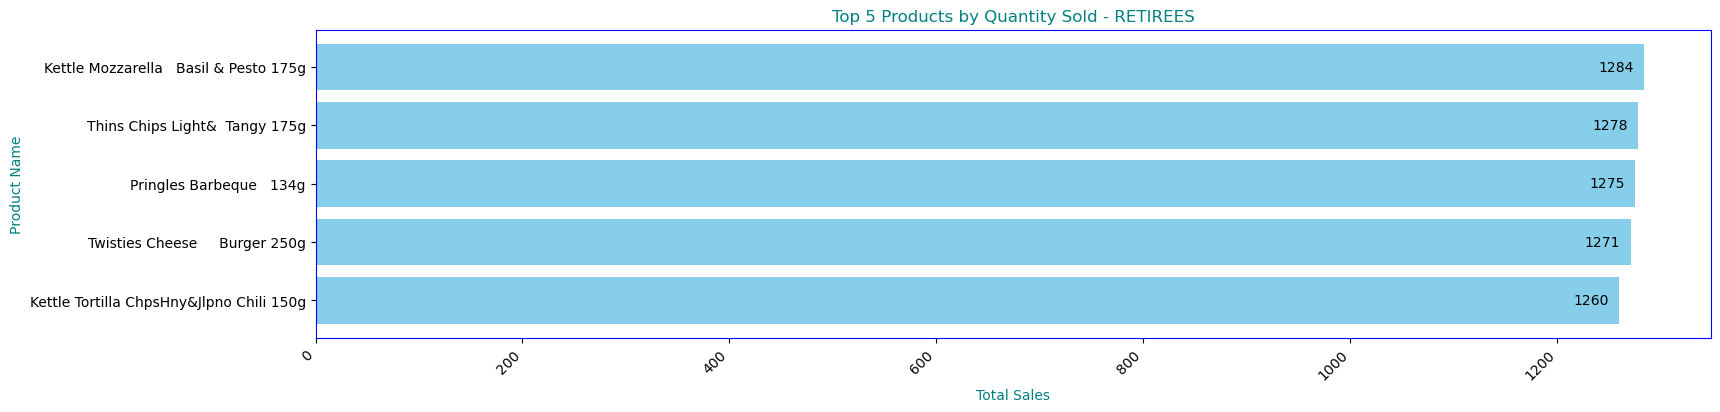

In [47]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_retirees['PROD_NAME'], quantity_sold_retirees['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - RETIREES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [48]:
young = df[df['LIFESTAGE'] == 'YOUNG FAMILIES']
quantity_sold_young = young.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_young

,LIFESTAGE,PROD_NAME,QtySold
32,YOUNG FAMILIES,Kettle Original 175g,1040
8,YOUNG FAMILIES,Cobs Popd Sea Salt Chips 110g,1011
6,YOUNG FAMILIES,Cheezels Cheese 330g,1006
40,YOUNG FAMILIES,Kettle Tortilla ChpsHny&Jlpno Chili 150g,999
10,YOUNG FAMILIES,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,995


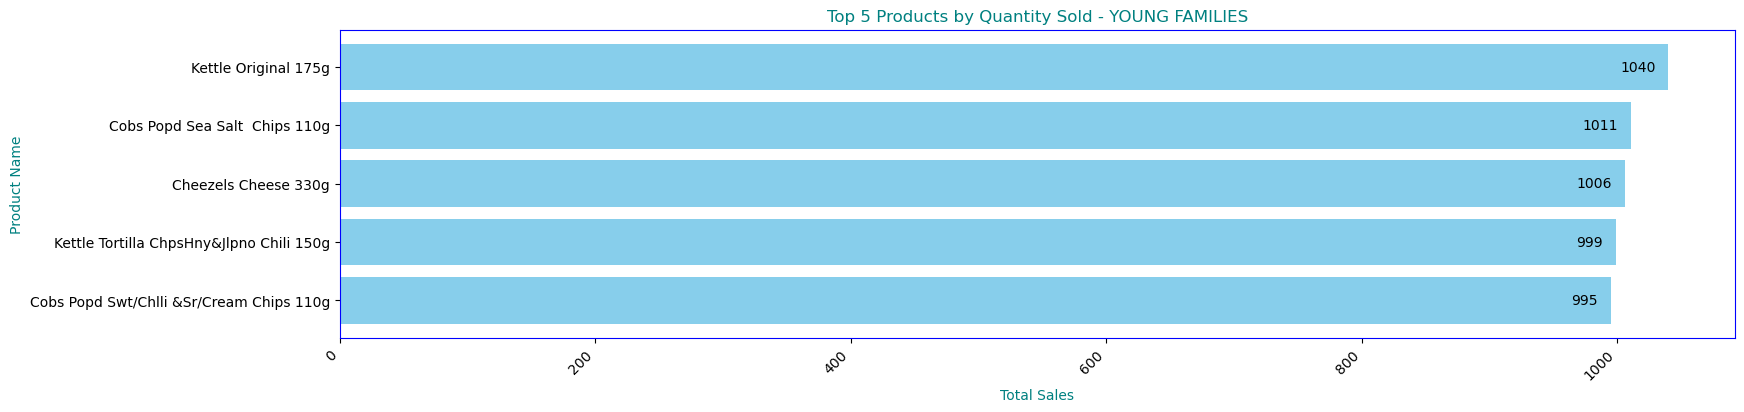

In [49]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_young['PROD_NAME'], quantity_sold_young['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - YOUNG FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [50]:
youngsc = df[df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']
quantity_sold_youngsc = youngsc.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_youngsc

,LIFESTAGE,PROD_NAME,QtySold
31,YOUNG SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,956
91,YOUNG SINGLES/COUPLES,Tostitos Splash Of Lime 175g,945
15,YOUNG SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,909
48,YOUNG SINGLES/COUPLES,Pringles Mystery Flavour 134g,906
17,YOUNG SINGLES/COUPLES,Doritos Corn Chips Original 170g,889


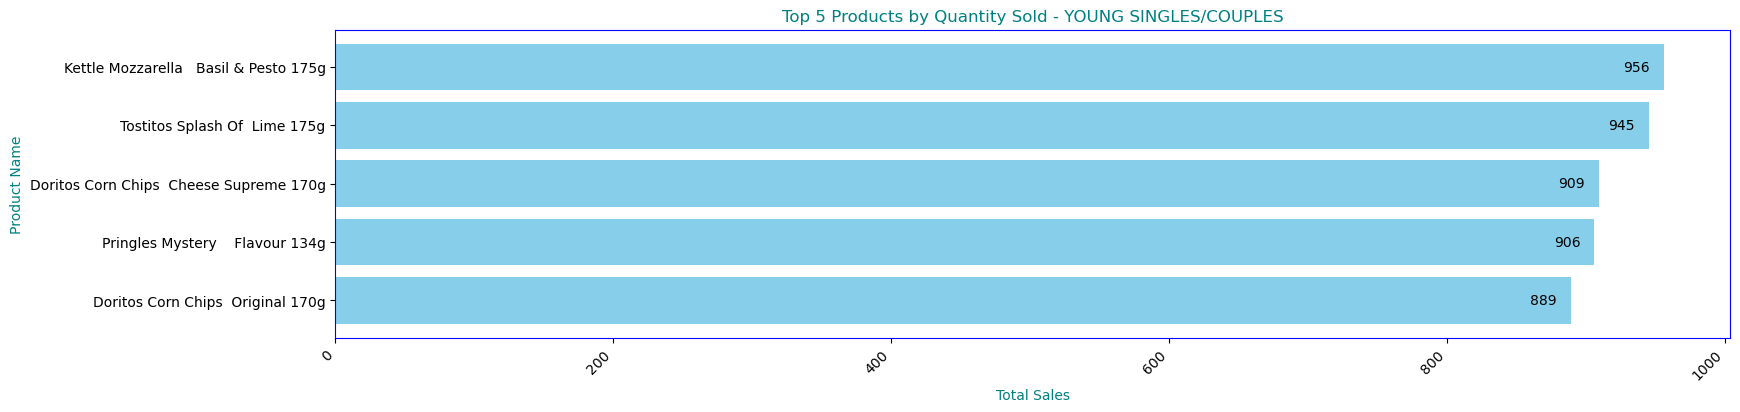

In [51]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_youngsc['PROD_NAME'], quantity_sold_youngsc['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - YOUNG SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [52]:
older = df[df['LIFESTAGE'] == 'OLDER FAMILIES']
quantity_sold_older = older.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_older

,LIFESTAGE,PROD_NAME,QtySold
71,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,1149
88,OLDER FAMILIES,Thins Potato Chips Hot & Spicy 175g,1128
27,OLDER FAMILIES,Infzns Crn Crnchers Tangy Gcamole 110g,1107
94,OLDER FAMILIES,Twisties Chicken270g,1102
70,OLDER FAMILIES,Smiths Crinkle Original 330g,1096


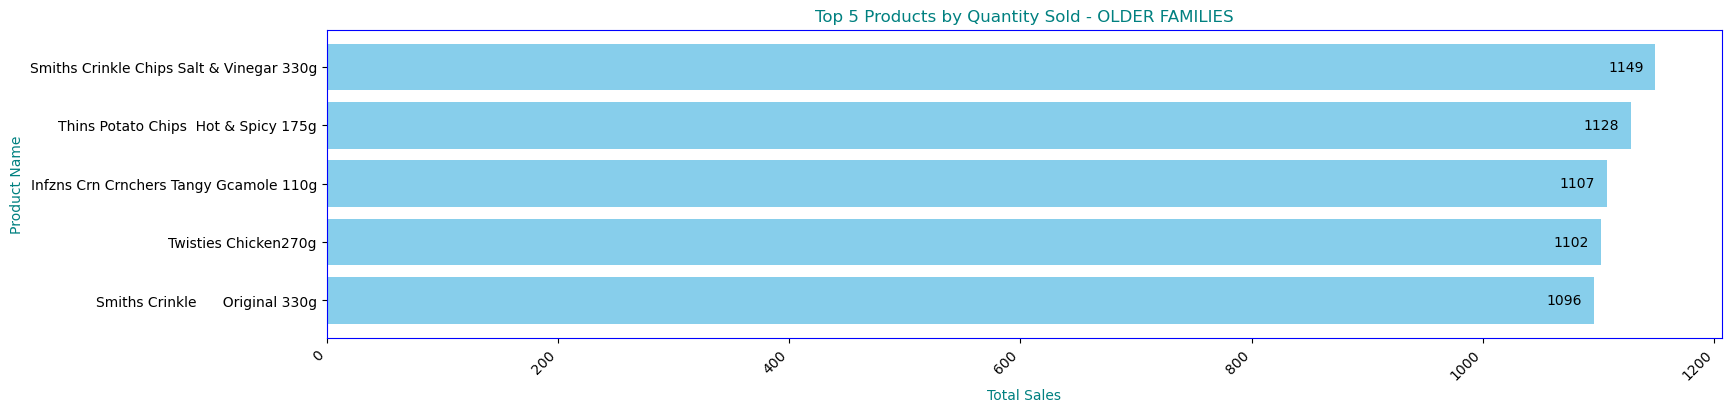

In [53]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_older['PROD_NAME'], quantity_sold_older['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - OLDER FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [54]:
oldersc = df[df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']
quantity_sold_oldersc = oldersc.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_oldersc

,LIFESTAGE,PROD_NAME,QtySold
28,OLDER SINGLES/COUPLES,Kettle 135g Swt Pot Sea Salt,1417
8,OLDER SINGLES/COUPLES,Cobs Popd Sea Salt Chips 110g,1394
87,OLDER SINGLES/COUPLES,Thins Chips Seasonedchicken 175g,1388
91,OLDER SINGLES/COUPLES,Tostitos Splash Of Lime 175g,1378
14,OLDER SINGLES/COUPLES,Doritos Corn Chip Southern Chicken 150g,1366


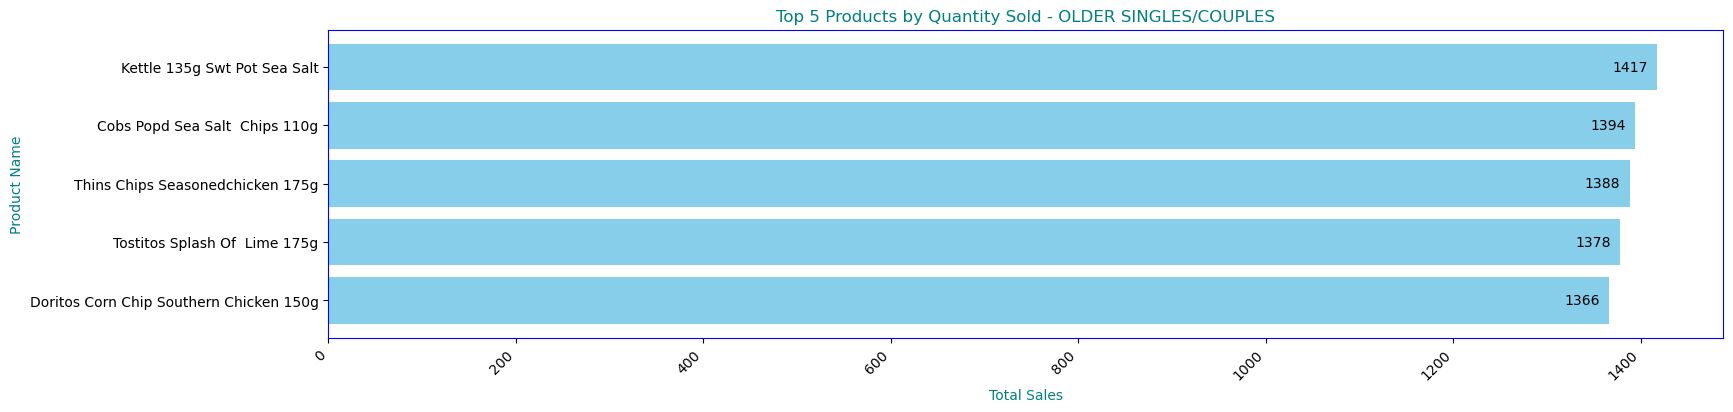

In [55]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_oldersc['PROD_NAME'], quantity_sold_oldersc['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - OLDER SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [56]:
mid = df[df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
quantity_sold_mid = mid.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_mid

,LIFESTAGE,PROD_NAME,QtySold
27,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,656
6,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,640
94,MIDAGE SINGLES/COUPLES,Twisties Chicken270g,638
79,MIDAGE SINGLES/COUPLES,Smiths Crnkle Chip Orgnl Big Bag 380g,635
37,MIDAGE SINGLES/COUPLES,Kettle Sweet Chilli And Sour Cream 175g,633


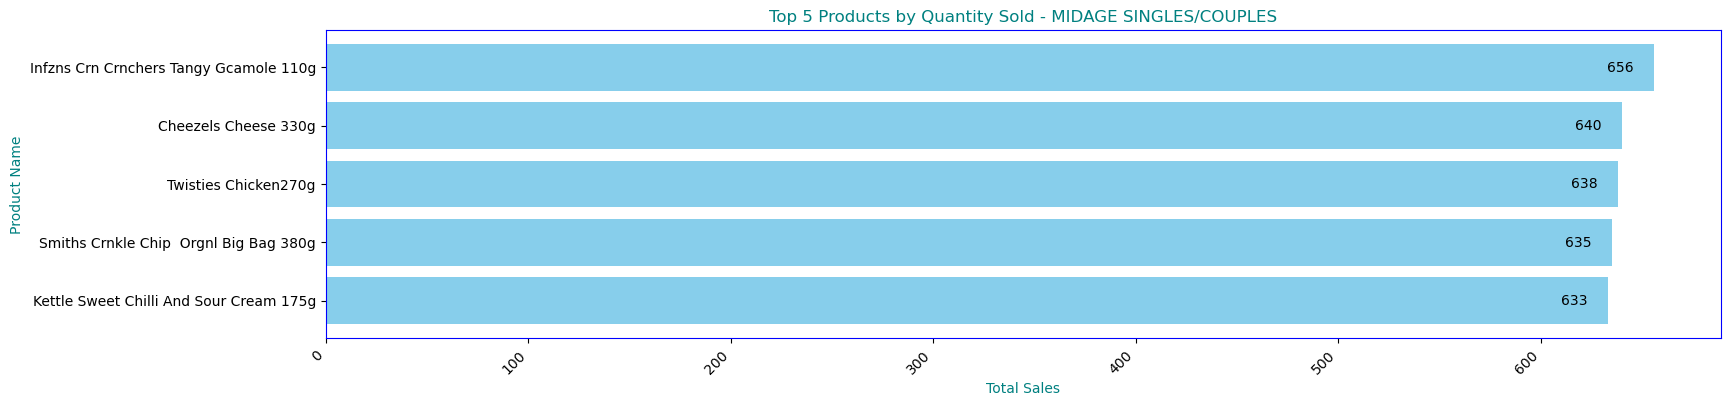

In [57]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_mid['PROD_NAME'], quantity_sold_mid['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - MIDAGE SINGLES/COUPLES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [58]:
new = df[df['LIFESTAGE'] == 'NEW FAMILIES']
quantity_sold_new = new.groupby(['LIFESTAGE' , 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'QtySold').sort_values(by= ['LIFESTAGE', 'QtySold'], ascending=[True, False]).head(5)
quantity_sold_new

,LIFESTAGE,PROD_NAME,QtySold
10,NEW FAMILIES,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,197
30,NEW FAMILIES,Kettle Honey Soy Chicken 175g,197
20,NEW FAMILIES,Grain Waves Sweet Chilli 210g,195
91,NEW FAMILIES,Tostitos Splash Of Lime 175g,191
14,NEW FAMILIES,Doritos Corn Chip Southern Chicken 150g,190


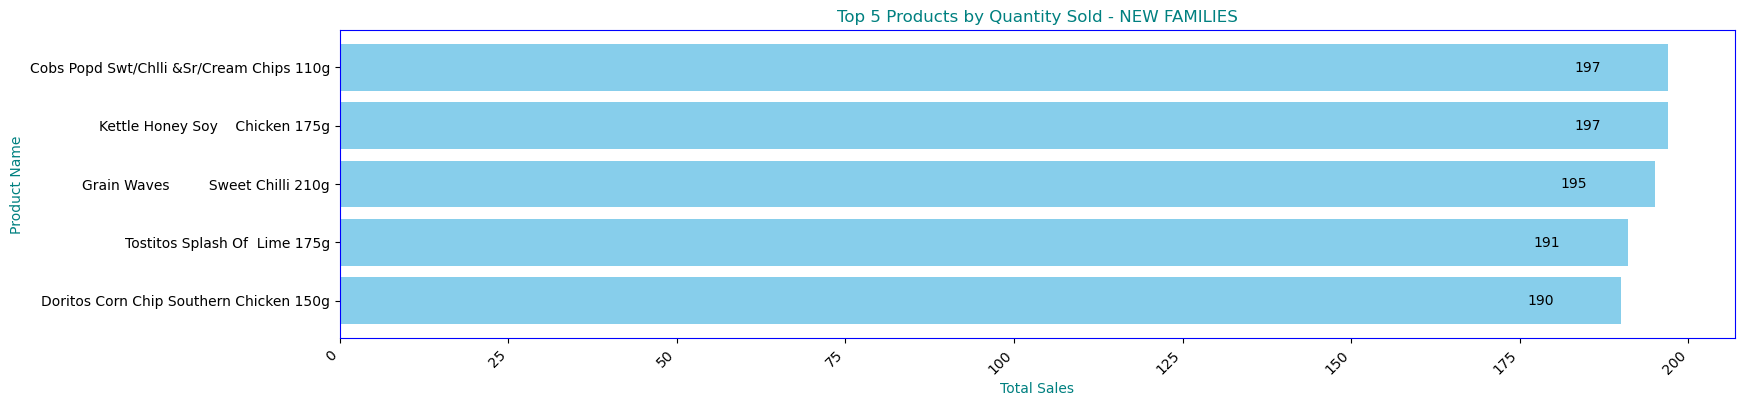

In [59]:
plt.figure(figsize=(18, 4))
bars = plt.barh(quantity_sold_new['PROD_NAME'], quantity_sold_new['QtySold'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products by Quantity Sold - NEW FAMILIES',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [60]:
unique_customers = df['PREMIUM_CUSTOMER'].unique()
unique_customers

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [61]:
# Group by 'PREMIUM_CUSTOMER' and count the number of occurrences
customer_counts = df['PREMIUM_CUSTOMER'].value_counts()

# Create a DataFrame with the counts
customer_counts_df = pd.DataFrame({'Customer Category': customer_counts.index, 'Count': customer_counts.values})

In [62]:
customer_counts

PREMIUM_CUSTOMER
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

In [63]:
customer_counts_df

,Customer Category,Count
0,Mainstream,95043
1,Budget,86762
2,Premium,64935


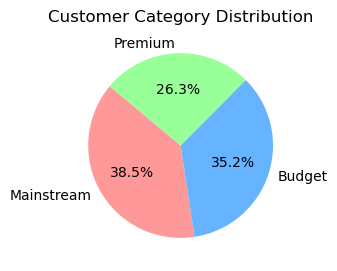

In [64]:
# Define the colors for each slice
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create the pie chart with custom colors
plt.figure(figsize=(3, 3))
plt.pie(customer_counts_df['Count'], labels=customer_counts_df['Customer Category'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Category Distribution')
plt.show()

In [65]:
premium_customers_df = df[df['PREMIUM_CUSTOMER'] == 'Premium']
top_5_products_premium_customers = premium_customers_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False).head(5)
top_5_products_premium_customers

,PROD_NAME,PROD_QTY
26,Infuzions Thai SweetChili PotatoMix 110g,1685
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1662
91,Tostitos Splash Of Lime 175g,1661
11,Dorito Corn Chp Supreme 380g,1656
31,Kettle Mozzarella Basil & Pesto 175g,1651


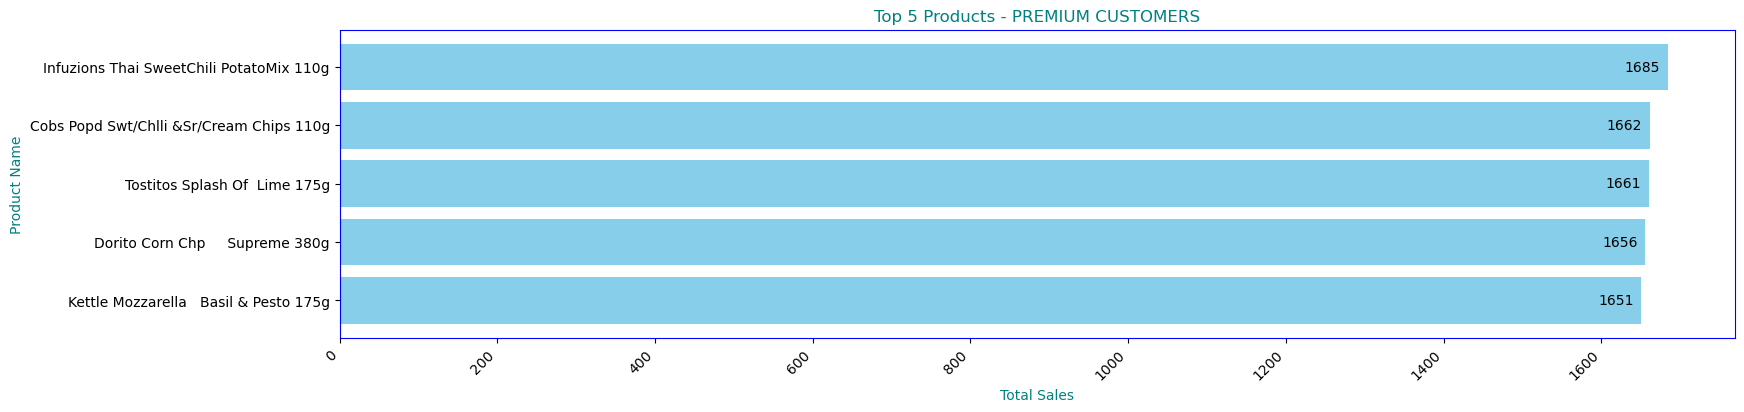

In [66]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top_5_products_premium_customers['PROD_NAME'], top_5_products_premium_customers['PROD_QTY'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products - PREMIUM CUSTOMERS',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [67]:
budget_customers_df = df[df['PREMIUM_CUSTOMER'] == 'Budget']
top_5_products_budget_customers = budget_customers_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False).head(5)
top_5_products_budget_customers

,PROD_NAME,PROD_QTY
31,Kettle Mozzarella Basil & Pesto 175g,2267
14,Doritos Corn Chip Southern Chicken 150g,2182
15,Doritos Corn Chips Cheese Supreme 170g,2175
8,Cobs Popd Sea Salt Chips 110g,2174
40,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2168


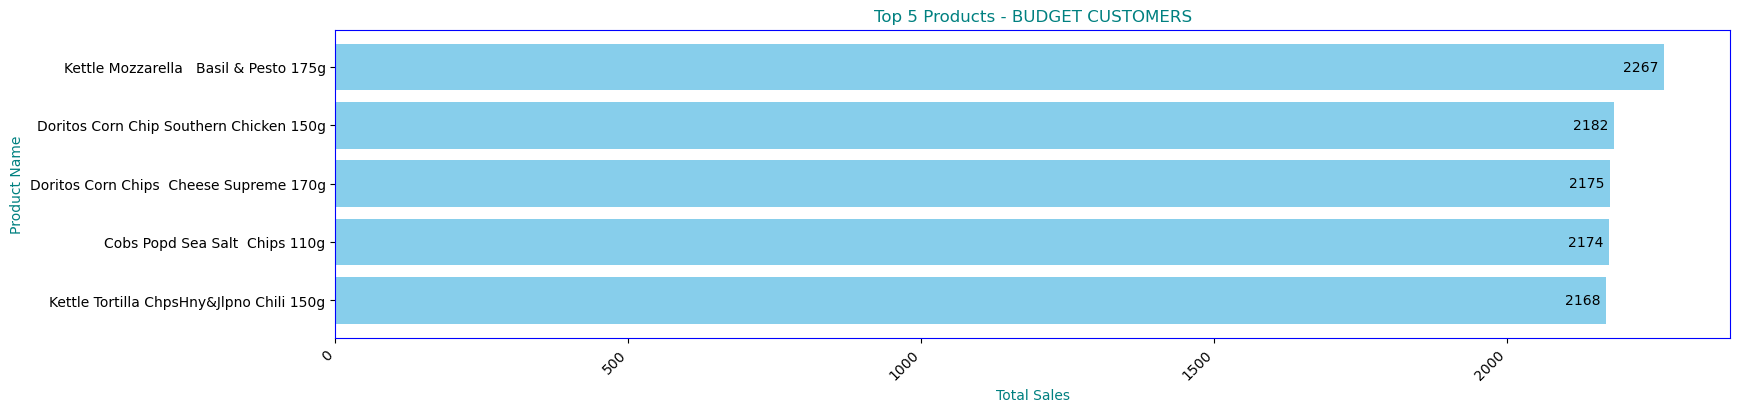

In [68]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top_5_products_budget_customers['PROD_NAME'], top_5_products_budget_customers['PROD_QTY'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products - BUDGET CUSTOMERS',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [69]:
mainstream_customers_df = df[df['PREMIUM_CUSTOMER'] == 'Mainstream']
top_5_products_mainstream_customers = mainstream_customers_df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False).head(5)
top_5_products_mainstream_customers

,PROD_NAME,PROD_QTY
40,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2611
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2511
8,Cobs Popd Sea Salt Chips 110g,2502
95,Tyrrells Crisps Ched & Chives 165g,2499
13,Doritos Corn Chip Mexican Jalapeno 150g,2495


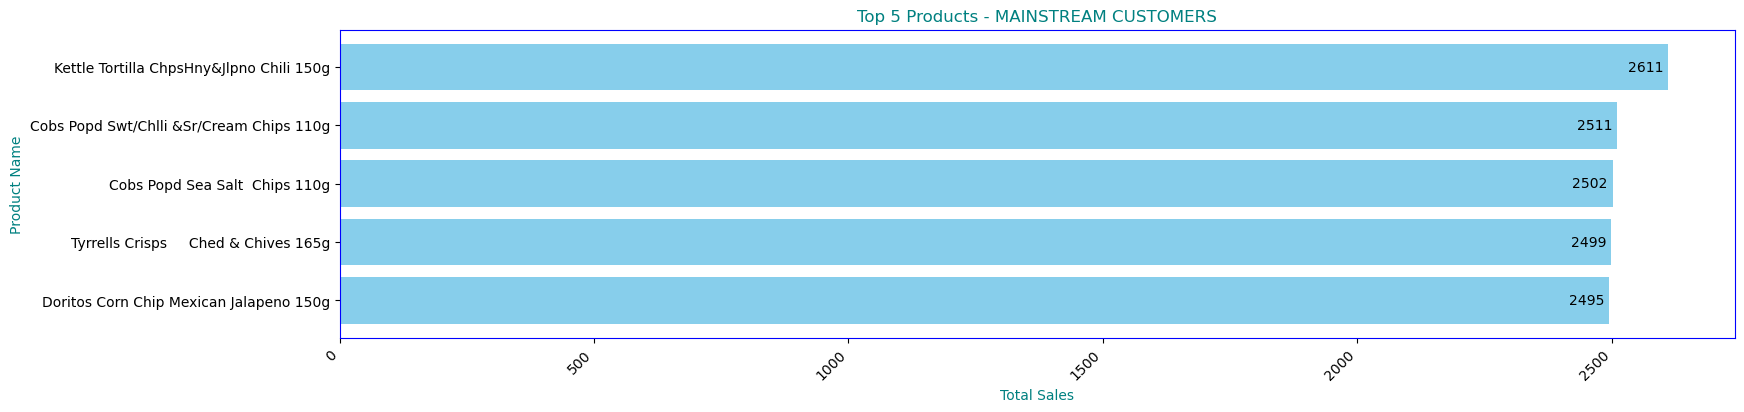

In [70]:
plt.figure(figsize=(18, 4))
bars = plt.barh(top_5_products_mainstream_customers['PROD_NAME'], top_5_products_mainstream_customers['PROD_QTY'], color='skyblue')
plt.xlabel('Total Sales', color='teal')
plt.ylabel('Product Name', color='teal')
plt.title('Top 5 Products - MAINSTREAM CUSTOMERS',color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [71]:
import re

# Function to extract weight
def extract_weight(text):
    match = re.search(r'(\d+)(?=g)', text)
    if match:
        return int(match.group(0))
    else:
        return None

# Apply the function to create the 'Weight' column
df['Weight'] = df['PROD_NAME'].apply(extract_weight)
df.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth,Z_Score,Weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,0.139336,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,1.654875,175.0
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,0.139336,160.0
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,-1.376203,175.0
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,0.139336,170.0


In [72]:
max_weight = df['Weight'].max()
max_weight

380.0

In [73]:
min_weight = df['Weight'].min()
min_weight

70.0

In [74]:
# Calculate the frequency of each pack size
pack_size_counts = df['Weight'].value_counts()

# Find the pack size with the highest frequency
most_sold_pack_size = pack_size_counts.idxmax()
most_sold_count = pack_size_counts.max()

print(f"The most sold pack size is {most_sold_pack_size} grams, with {most_sold_count} transactions.")


The most sold pack size is 175.0 grams, with 64929 transactions.


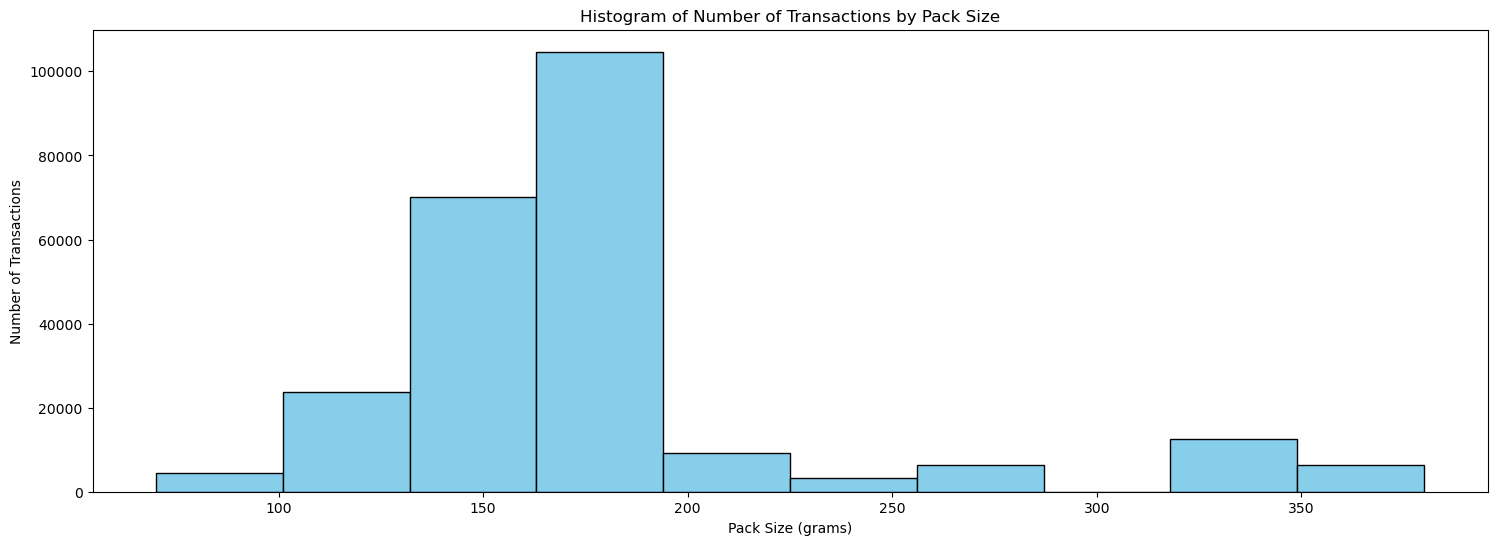

In [75]:
import matplotlib.pyplot as plt

# Plot histogram for pack size
plt.figure(figsize=(18, 6))
plt.hist(df['Weight'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Pack Size (grams)')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Number of Transactions by Pack Size')

# Show plot
plt.show()


In [76]:
# Group the data by 'LIFESTAGE' and calculate the most popular pack size within each group
most_popular_pack_size_by_lifestage = df.groupby('LIFESTAGE')['Weight'].apply(lambda x: x.value_counts().idxmax())

print("Most popular pack size by lifestage:")
print(most_popular_pack_size_by_lifestage)


Most popular pack size by lifestage:
LIFESTAGE
MIDAGE SINGLES/COUPLES    175.0
NEW FAMILIES              175.0
OLDER FAMILIES            175.0
OLDER SINGLES/COUPLES     175.0
RETIREES                  175.0
YOUNG FAMILIES            175.0
YOUNG SINGLES/COUPLES     175.0
Name: Weight, dtype: float64


In [77]:
# Group the data by 'LIFESTAGE' and calculate the most popular pack size within each group
most_popular_pack_size_by_lifestage = df.groupby('PREMIUM_CUSTOMER')['Weight'].apply(lambda x: x.value_counts().idxmax())

print("Most popular pack size by lifestage:")
print(most_popular_pack_size_by_lifestage)


Most popular pack size by lifestage:
PREMIUM_CUSTOMER
Budget        175.0
Mainstream    175.0
Premium       175.0
Name: Weight, dtype: float64


In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_lifestage_and_premium = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Rename columns for better readability
total_sales_by_lifestage_and_premium.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL_SALES']

# Print the DataFrame to verify
print("Total sales by LIFESTAGE and PREMIUM_CUSTOMER:")
print(total_sales_by_lifestage_and_premium)


Total sales by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_SALES
0   MIDAGE SINGLES/COUPLES           Budget     33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25
2   MIDAGE SINGLES/COUPLES          Premium     54443.85
3             NEW FAMILIES           Budget     20607.45
4             NEW FAMILIES       Mainstream     15979.70
5             NEW FAMILIES          Premium     10760.80
6           OLDER FAMILIES           Budget    156863.75
7           OLDER FAMILIES       Mainstream     96413.55
8           OLDER FAMILIES          Premium     75242.60
9    OLDER SINGLES/COUPLES           Budget    127833.60
10   OLDER SINGLES/COUPLES       Mainstream    124648.50
11   OLDER SINGLES/COUPLES          Premium    123537.55
12                RETIREES           Budget    105916.30
13                RETIREES       Mainstream    145168.95
14                RETIREES          Premium     91296.65
15          YOUNG FAMILIES           Budg

<function matplotlib.pyplot.show(close=None, block=None)>

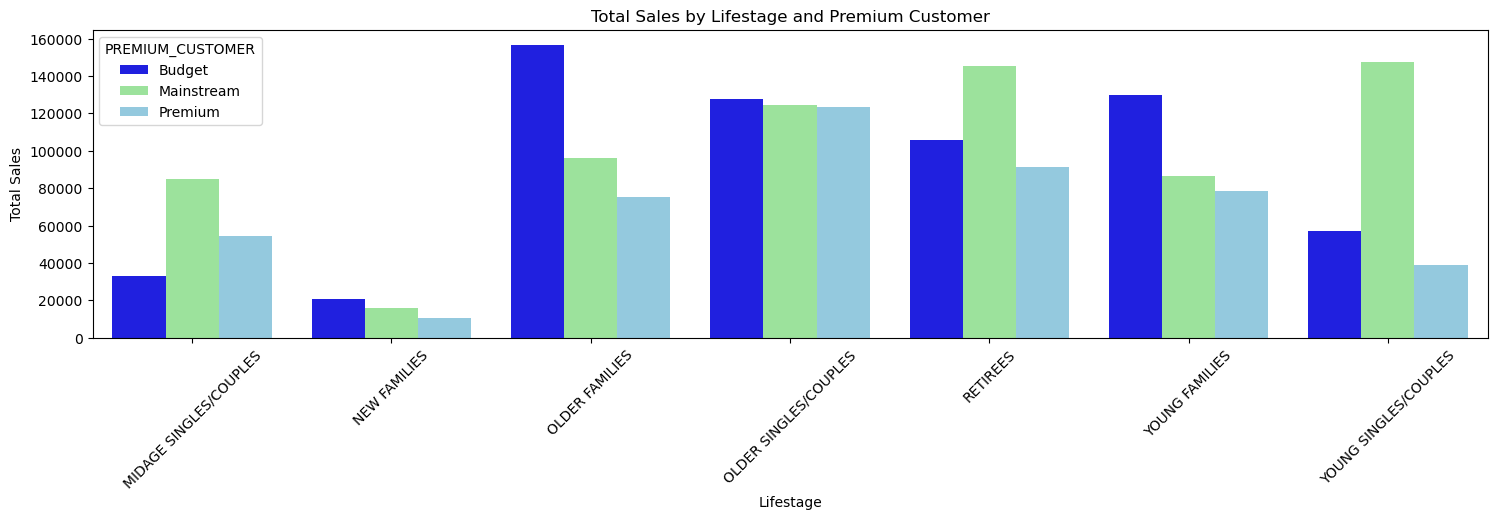

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom colors
custom_colors = ['blue', 'lightgreen', 'skyblue']

# Set the size of the plot
plt.figure(figsize=(18, 4))

# Create a bar plot with the custom colors
sns.barplot(data=total_sales_by_lifestage_and_premium, x='LIFESTAGE', y='TOTAL_SALES', hue='PREMIUM_CUSTOMER', palette=custom_colors)

# Add labels and title
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Lifestage and Premium Customer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show


In [80]:
df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth,Z_Score,Weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,0.139336,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,1.654875,175.0
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,0.139336,160.0
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,-1.376203,175.0
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,0.139336,170.0


In [81]:

# Function to extract brand name
def extract_brand(text):
   brand_name = text.split()[0].upper() if text else None
   return brand_name

# Apply the function to create the 'Weight' column
df['Brand'] = df['PROD_NAME'].apply(extract_brand)
df.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth,Z_Score,Weight,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10,0.139336,175.0,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05,1.654875,175.0,CCS
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,2018-11,0.139336,160.0,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,2019-03,-1.376203,175.0,CCS
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05,0.139336,170.0,SMITHS


In [82]:
customer_count = df['Brand'].value_counts()
customer_count

Brand
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64

In [83]:
customer_count_df = pd.DataFrame({'Brand Category': customer_count.index, 'Count': customer_count.values})
customer_count_df 

,Brand Category,Count
0,KETTLE,41288
1,SMITHS,27390
2,PRINGLES,25102
3,DORITOS,22041
4,THINS,14075
5,RRD,11894
6,INFUZIONS,11057
7,WW,10320
8,COBS,9693
9,TOSTITOS,9471


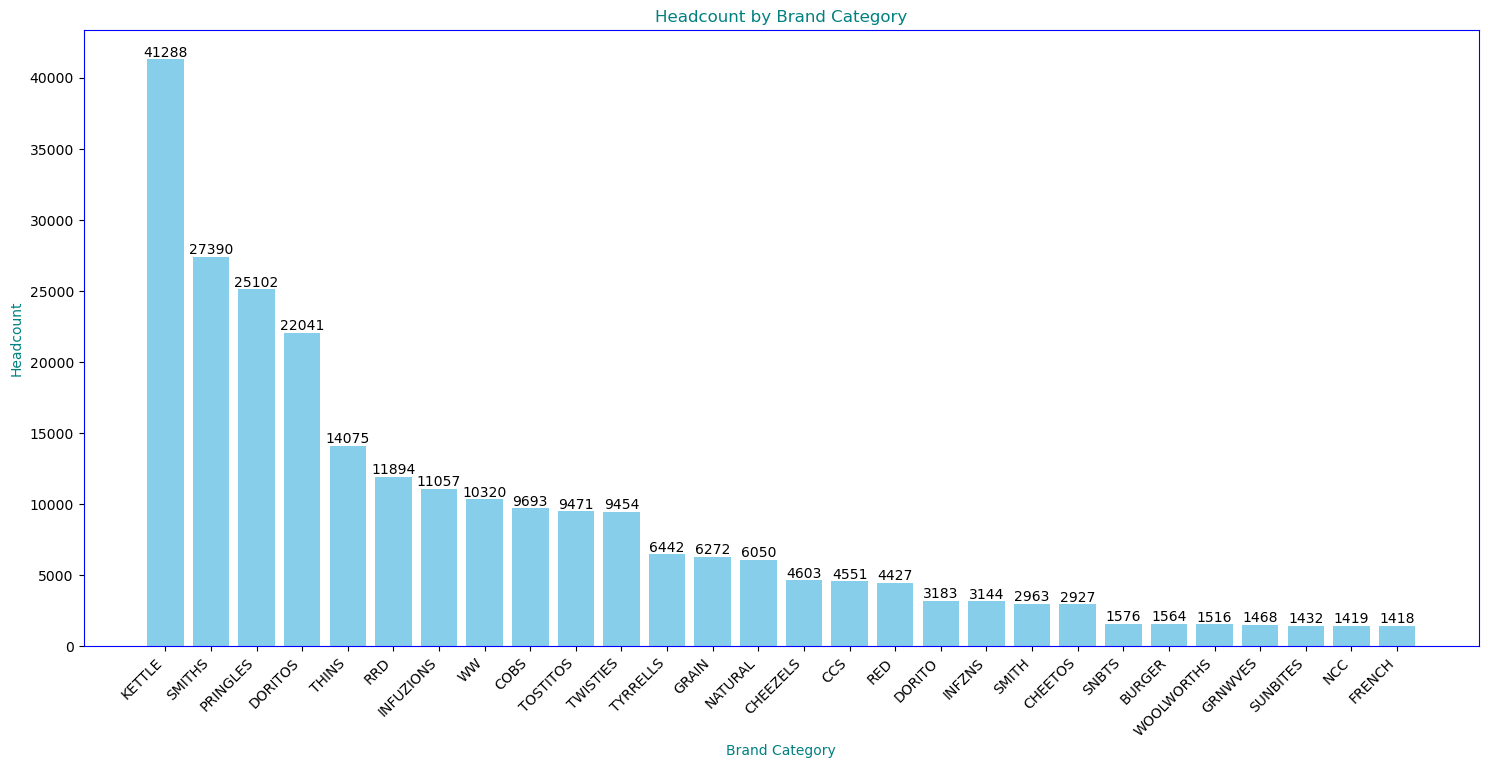

In [84]:
plt.figure(figsize=(18, 8))
bars = plt.bar(customer_count_df['Brand Category'], customer_count_df['Count'], color='skyblue')
plt.xlabel('Brand Category', color='teal')
plt.ylabel('Headcount', color='teal')
plt.title('Headcount by Brand Category', color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x coordinate for the label
        bar.get_height(),  # y coordinate for the label
        f'{bar.get_height():.0f}',  # label text
        va='bottom',  # vertical alignment of the text
        ha='center',  # horizontal alignment of the text
        color='black'  # color of the text
    )

plt.show()

In [85]:
total_sales_by_brands = df.groupby('Brand')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False).head(5)
total_sales_by_brands

,Brand,TOT_SALES
12,KETTLE,390239.8
19,SMITHS,202908.6
6,DORITOS,187277.9
15,PRINGLES,177655.5
22,THINS,88852.5


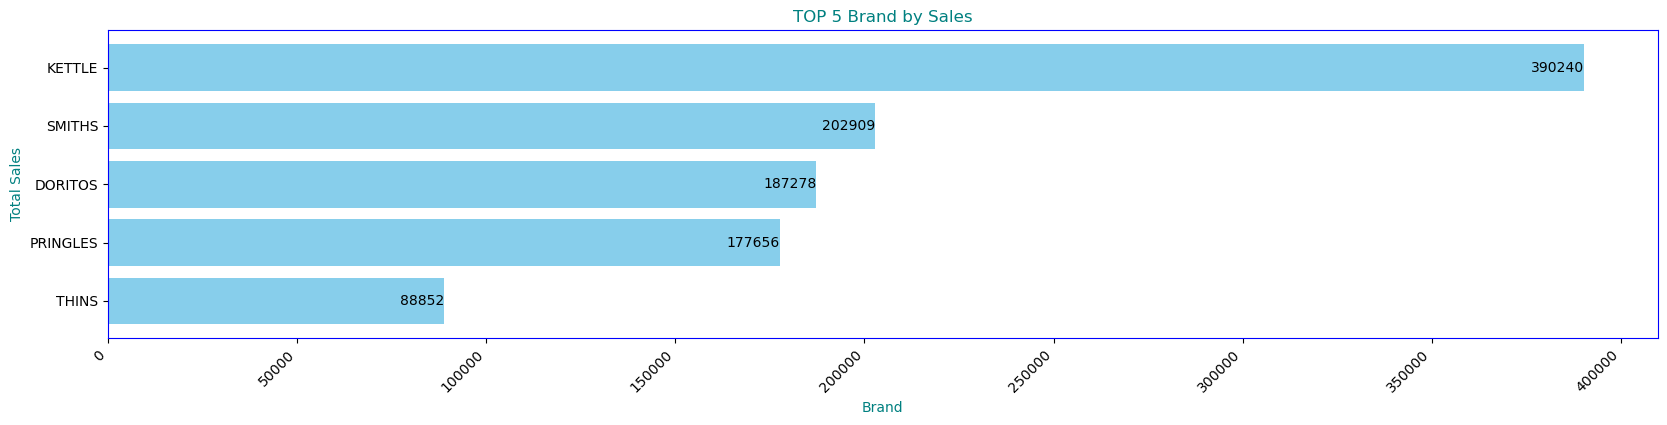

In [86]:
plt.figure(figsize=(20, 4))
bars = plt.barh(total_sales_by_brands['Brand'], total_sales_by_brands['TOT_SALES'], color='skyblue')
plt.xlabel('Brand', color='teal')
plt.ylabel('Total Sales', color='teal')
plt.title('TOP 5 Brand by Sales', color='teal')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()  
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

for bar in bars:
    plt.text(
        bar.get_width() - 10,  # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,  # y coordinate for the label
        f'{bar.get_width():.0f}',  # label text
        va='center',  # vertical alignment of the text
        ha='right',  # horizontal alignment of the text
        color='black'  # color of the text
    )
    
plt.show()